In [1]:
# Import libraries
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
# Define data pre-processing functions 

# Import the mnist dataset 
def import_mnist_data(num_img):
    # Unzip the mnist data
    if not os.path.exists("mnist_dataset/"):
        !unzip mnist_dataset.zip
    # Load the mnist data
    # Ignore the first column of the data (the label)
    data = np.loadtxt("mnist_dataset/mnist_test.csv", delimiter=",", max_rows=num_img, usecols=range(1,785))
    data = data.reshape(num_img, 784)
    return data

# Sparsify the data by setting all values below a threshold to 0
def sparsify_data(data, threshold):
    sparse_data = np.copy(data)
    for i in range(sparse_data.shape[0]):
        for j in range(sparse_data.shape[1]):
            sparse_data[i,j] = 1 if sparse_data[i,j] > threshold else 0

    return sparse_data

# Generates a random measurement matrix with normalized columns
def make_meas_matrix(rows, cols):
    # Generate a matrix of numbers from the standard normal distribution
    meas_matrix = np.random.randn(rows, cols)
    # Normalize the columns of the matrix
    for i in range(cols):
        meas_matrix[:,i] = meas_matrix[:,i] / np.linalg.norm(meas_matrix[:,i])

    return meas_matrix

# Generate measurements from the data using the measurement matrix
def get_measurements(data, meas_matrix):
    return meas_matrix @ data.T

# Plot the original image and the sparsified image
def plot_images(original_data, sparsified_data):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[0].set_title("Original Image")
    axs[1].imshow(sparsified_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=1)
    axs[1].set_title("Sparsified Image")
    plt.show()

(1, 784)
(1, 784)
(25, 784)
(25, 1)


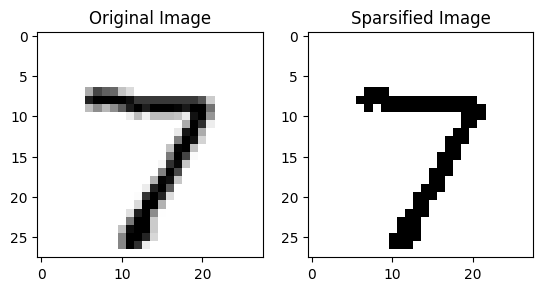

In [12]:
# Testing out data pre-processing functions

data = import_mnist_data(1)
print(data.shape)

sparse_data = sparsify_data(data, 100)
print(sparse_data.shape)

meas_matrix = make_meas_matrix(25,784)
print(meas_matrix.shape)

measurement = get_measurements(sparse_data, meas_matrix)
print(measurement.shape)

plot_images(data, sparse_data)